In [29]:
# Importe das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import datetime
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime, timedelta
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import train_test_split

In [30]:
# Importar a base de dados
df = pd.read_csv('livro.csv', header =0, sep = ',', decimal = ',')

In [31]:
# Colocando loan como um número inteiro
df['loan'] = df['loan'].astype(np.int32)
# Colocando a coluna data com formato de data
df['data'] = pd.to_datetime(df['data'])

In [32]:
# Análise descritiva

df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    104 non-null    datetime64[ns]
 1   loan    104 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.3 KB


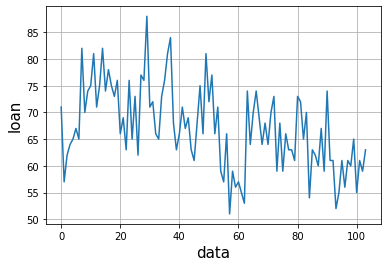

In [33]:

# plotar gráfico de consumo de eletricidade
plt.plot(df.index, df.loan)
plt.xlabel('data', fontsize = 15)
plt.ylabel('loan',fontsize = 15)
plt.grid()

In [34]:
# Verificando a Estacionariedade

test_estacionariedade = adfuller(df['loan'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                            -3.289162
p-valor                           0.015370
Lags                              1.000000
Número de observações usadas    102.000000
Valor crítico(1%)                -3.496149
Valor crítico(5%)                -2.890321
Valor crítico(10%)               -2.582122
dtype: float64


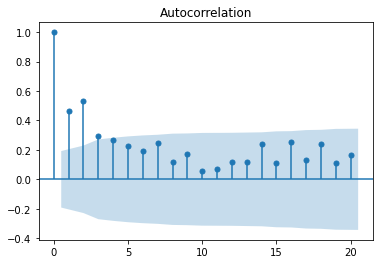

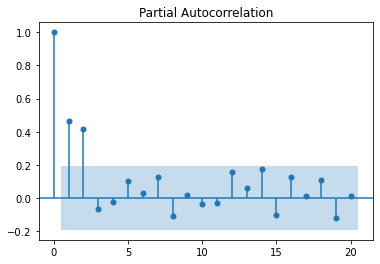

In [35]:
# Verificando as funções ACF e PACF
acf = plot_acf(df['loan'], lags = 20)
pacf = plot_pacf(df['loan'], lags = 20)

In [36]:
# Modelo Arima
model = ARIMA(df['loan'], order=(2,1,0))
results_AR = model.fit(disp=-1)
model_fit = model.fit()

/home/jrs/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [37]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.loan   No. Observations:                  103
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -339.725
Method:                       css-mle   S.D. of innovations              6.536
Date:                Sun, 31 Jan 2021   AIC                            687.450
Time:                        00:08:16   BIC                            697.989
Sample:                             1   HQIC                           691.719
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0406      0.392     -0.104      0.917      -0.809       0.728
ar.L1.D.loan    -0.6020      0.099     -6.063      0.000      -0.797      -0.407
ar.L2.D.loan    -0.0478      0.099     -0.48

Plotting AR model


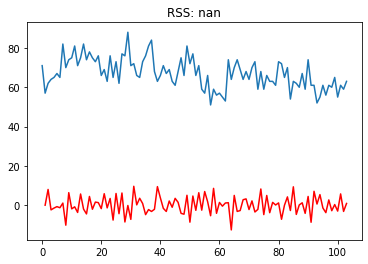

In [38]:

plt.plot(df['loan'])
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - df['loan'])**2))
print('Plotting AR model')

In [48]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [49]:
acorr_ljungbox(model_fit.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,10.455974,0.40144
